In [ ]:
import pandas as pd

In [ ]:
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from keras import backend as K
import matplotlib.pyplot as plt

gen = None

# Custom loss function
def custom_loss(y_true, y_pred):
    return K.mean(K.round(K.maximum(y_pred, 1.0)) - y_true)

# Define generator model
def build_generator(dim):
    model = Sequential()
    model.add(Dense(128, input_dim=dim, activation='relu'))
    model.add(Dense(64,activation ='relu'))
    model.add(Dense(dim, activation='sigmoid'))
    return model

    return model

# Define discriminator model
def build_discriminator(dim):
    model = Sequential()
    model.add(Dense(128, input_dim=dim, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Build GAN model
def build_gan(generator, discriminator, gen_optimizer, disc_optimizer):
    discriminator.trainable = False
    gan_input = generator.input
    gan_output = discriminator(generator.output)
    gan = Model(gan_input, gan_output)
    gan.compile(optimizer=gen_optimizer, loss='binary_crossentropy')
    discriminator.trainable = True
    discriminator.compile(optimizer=disc_optimizer, loss='binary_crossentropy')
    return gan

# Train GAN function
# Train GAN function
def train_gan(generator, discriminator, gan, X_train, epochs=10000, batch_size=128):
    g_losses = []
    d_losses = []
    lowest_accuracy = float('inf')  # Initialize with infinity
    best_gan = None  # Initialize with None
    for epoch in range(epochs):
        # Generate fake data
        noise = np.random.normal(0, 1, size=(batch_size, generator.input_shape[1]))
        fake_data = generator.predict(noise)


        # Select a random batch of real data
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_data = X_train[idx]

        # Labels for fake and real data
        fake_labels = np.zeros((batch_size, 1))
        real_labels = np.ones((batch_size, 1))

        # Train discriminator
        d_loss_fake = discriminator.train_on_batch(fake_data, fake_labels)
        d_loss_real = discriminator.train_on_batch(real_data, real_labels)

        # Compute discriminator loss
        d_loss = 0.5 * np.add(d_loss_fake, d_loss_real)

        # Generate noise for generator input
        noise = np.random.normal(0, 1, size=(batch_size, generator.input_shape[1]))

        # Train generator using custom loss
        g_loss = gan.train_on_batch(noise, real_labels)

        # Append losses
        g_losses.append(g_loss)
        d_losses.append(d_loss)


        current_accuracy = min(d_loss_fake, d_loss_real)
        if current_accuracy < lowest_accuracy:
            lowest_accuracy = current_accuracy
            # Save the GAN model
            best_gan = generator

        # Print progress
        print(f"Epoch {epoch+1}/{epochs} [D loss: {d_loss}, G loss: {g_loss}]")

    # Plot losses
    plt.plot(range(1, epochs+1), g_losses, label='Generator Loss')
    plt.plot(range(1, epochs+1), d_losses, label='Discriminator Loss')
    plt.title('GAN Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    return generator

def build_model(df):
  # Assuming df is your data
  X_train = df.values

  feature = df.shape[1]

  # Build generator and discriminator models
  generator = build_generator(feature)
  discriminator = build_discriminator(feature)

  # Define optimizers with different learning rates
  gen_optimizer = Adam(learning_rate=0.0001, beta_1=0.5)
  disc_optimizer = Adam(learning_rate=0.00005, beta_1=0.5)

  # Build GAN model
  gan = build_gan(generator, discriminator, gen_optimizer, disc_optimizer)

  # Train GAN model and get the one with lowest accuracy
  best_gan_model = train_gan(generator, discriminator, gan, X_train)

  return best_gan_model

In [ ]:
breast_df = pd.read_csv("breast.csv")
heart_df = pd.read_csv("heart.csv")

In [ ]:
breast_df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming breast_df is your DataFrame
label_encoder = LabelEncoder()
breast_df['diagnosis'] = label_encoder.fit_transform(breast_df['diagnosis'])

In [ ]:
breast_df.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [ ]:
train=breast_df[breast_df.diagnosis == 1]

In [ ]:
# Assuming you've already added the 'diagnosis_encoded' column
train.drop(columns=['diagnosis','id'], inplace=True)


<ipython-input-8-6e2464e2d19e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns=['diagnosis','id'], inplace=True)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

cols = train.columns

# Apply MinMax scaling to the selected columns
train = scaler.fit_transform(train)

# Now all features except the target column 'diagnosis_encoded' are scaled between 0 and 1


In [ ]:
train = pd.DataFrame(train , columns = cols)

In [ ]:
train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,0.379536,0.388405,0.372773,0.288294,0.411163,0.331177,0.339593,0.374150,0.358597,0.267904,...,0.357535,0.384795,0.338774,0.244050,0.421381,0.321364,0.372267,0.584891,0.329131,0.239341
std,0.186712,0.130778,0.187433,0.171982,0.177606,0.180349,0.186235,0.190027,0.159573,0.159505,...,0.184637,0.165342,0.177345,0.159633,0.162746,0.169240,0.158380,0.176741,0.147220,0.141367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240385,0.309602,0.230232,0.160653,0.285956,0.212293,0.212365,0.244955,0.249711,0.139796,...,0.210776,0.277228,0.206051,0.123388,0.314444,0.191881,0.263909,0.472348,0.236546,0.139463
50%,0.371503,0.383391,0.362779,0.266617,0.401324,0.288291,0.316196,0.364697,0.341224,0.244629,...,0.334052,0.373441,0.318483,0.212205,0.410999,0.303013,0.332385,0.583985,0.303174,0.213564
75%,0.503497,0.463149,0.497642,0.393638,0.524229,0.422081,0.444541,0.458096,0.456409,0.360468,...,0.472737,0.487375,0.449729,0.321592,0.504204,0.393905,0.464385,0.693428,0.399616,0.312115
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 2ms/step
Epoch 7501/10000 [D loss: 0.7011016309261322, G loss: 0.6701169013977051]
4/4 [==============================] - 0s 3ms/step
Epoch 7502/10000 [D loss: 0.7019796371459961, G loss: 0.6698150038719177]
4/4 [==============================] - 0s 3ms/step
Epoch 7503/10000 [D loss: 0.7018402814865112, G loss: 0.6696130037307739]
4/4 [==============================] - 0s 2ms/step
Epoch 7504/10000 [D loss: 0.7018173933029175, G loss: 0.6694729924201965]
4/4 [==============================] - 0s 3ms/step
Epoch 7505/10000 [D loss: 0.7011657357215881, G loss: 0.6692591905593872]
4/4 [==============================] - 0s 3ms/step
Epoch 7506/10000 [D loss: 0.701817512512207, G loss: 0.6696465015411377]
4/4 [==============================] - 0s 3ms/step
Epoch 7507/10000 [D loss: 0.7017401456832886, G loss: 0.6688511967658997]
4/4 [==============================] - 0s 3ms/step
Epoch 7508/10000 [D loss

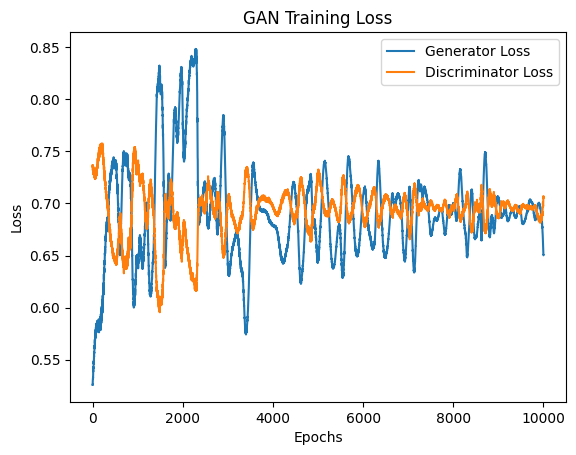

In [ ]:
generator = build_model(train)

In [ ]:
# Check if the best GAN model is available
if generator is not None:
    num_outputs = 145  # Change this to the desired number of outputs

    # Generate noise
    noise = np.random.normal(0, 1, size=(num_outputs, train.shape[1]))

    # Generate data using the GAN model
    generated_data = generator.predict(noise)
    generated_data = scaler.inverse_transform(generated_data)

    # Convert generated data into a DataFrame
    generated_df = pd.DataFrame(generated_data, columns=train.columns)

    # Display the generated data as a table
    print(generated_df)

5/5 [==============================] - 0s 2ms/step
     radius_mean  texture_mean  perimeter_mean    area_mean  smoothness_mean  \
0      19.289141     20.106541      120.149368  1187.996094         0.099814   
1      19.803516     20.541878      124.329086  1284.913696         0.101537   
2      19.573753     20.905729      126.490822  1248.741089         0.100142   
3      18.867714     19.975117      120.477768  1141.438599         0.103929   
4      20.081554     21.067600      116.090385  1237.991333         0.104639   
..           ...           ...             ...          ...              ...   
140    20.517654     20.661442      128.434097  1376.406860         0.101508   
141    19.651367     20.031158      115.411156  1215.001465         0.098729   
142    19.544346     19.366911      120.669609  1337.183716         0.105368   
143    21.077374     19.450888      128.597458  1424.196777         0.101918   
144    20.404652     20.447422      123.466019  1272.927612         0

In [ ]:
generated_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,19.289141,20.106541,120.149368,1187.996094,0.099814,0.130781,0.116176,0.114318,0.186709,0.057749,...,19.941334,29.937689,158.613983,1448.713257,0.135852,0.253780,0.394998,0.180011,0.323489,0.078682
1,19.803516,20.541878,124.329086,1284.913696,0.101537,0.134383,0.112090,0.112867,0.180987,0.057258,...,20.544666,32.741917,160.161758,1441.647705,0.134728,0.248936,0.397203,0.176275,0.303816,0.079663
2,19.573753,20.905729,126.490822,1248.741089,0.100142,0.124652,0.115881,0.112217,0.177579,0.058291,...,21.282860,32.864521,166.164810,1568.760742,0.132531,0.256485,0.419825,0.179334,0.305116,0.076735
3,18.867714,19.975117,120.477768,1141.438599,0.103929,0.113263,0.124358,0.109715,0.193400,0.058328,...,19.386684,32.565475,146.805832,1504.884277,0.134015,0.245863,0.403714,0.180526,0.312671,0.075509
4,20.081554,21.067600,116.090385,1237.991333,0.104639,0.137553,0.143647,0.112316,0.186647,0.061582,...,19.775993,30.851826,154.633667,1599.591309,0.141899,0.265739,0.432827,0.185117,0.316980,0.084743


In [ ]:
generated_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,19.963366,20.383991,123.641823,1281.320923,0.101328,0.124824,0.126050,0.115519,0.181292,0.058237,...,20.577372,30.890295,154.429092,1535.309448,0.132924,0.228581,0.365746,0.175905,0.297649,0.077861
std,0.621451,1.028921,4.637671,77.171494,0.003207,0.011500,0.017146,0.005654,0.006093,0.001827,...,1.001267,1.381731,6.106793,148.728882,0.005378,0.036119,0.043964,0.011084,0.020236,0.004961
min,18.094704,16.636230,110.841301,1062.176270,0.093008,0.090726,0.084285,0.101456,0.164341,0.054708,...,17.765263,24.829922,137.208939,1181.348389,0.118419,0.141466,0.251307,0.146862,0.233914,0.064056
25%,19.556164,19.772720,120.631554,1225.682129,0.098746,0.115651,0.114225,0.112007,0.177147,0.056783,...,19.906607,30.104568,149.880554,1429.975220,0.128813,0.203761,0.341984,0.168008,0.284030,0.074801
50%,19.961294,20.541878,123.604233,1281.469604,0.101508,0.125398,0.124779,0.114917,0.181189,0.058037,...,20.544666,30.851826,154.516632,1512.506714,0.132744,0.226754,0.365753,0.176254,0.297033,0.077576
75%,20.363636,21.094280,126.928566,1336.816162,0.103803,0.133919,0.136670,0.119477,0.185159,0.059434,...,21.317287,31.761240,159.470245,1643.297974,0.136647,0.254053,0.391651,0.184085,0.310191,0.081315
max,21.587402,22.753534,134.655151,1438.911377,0.107782,0.149199,0.170249,0.129058,0.197411,0.063224,...,22.934790,34.137356,168.505676,1878.690186,0.144267,0.320497,0.482732,0.201711,0.358268,0.089252


In [ ]:
breast_df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
generated_df["diagnosis"] = 1

fianl_df = pd.concat([breast_df,generated_df])
fianl_df.to_csv('breast_combined.csv', index=False)
generated_df.to_csv('breast_generated.csv', index=False)

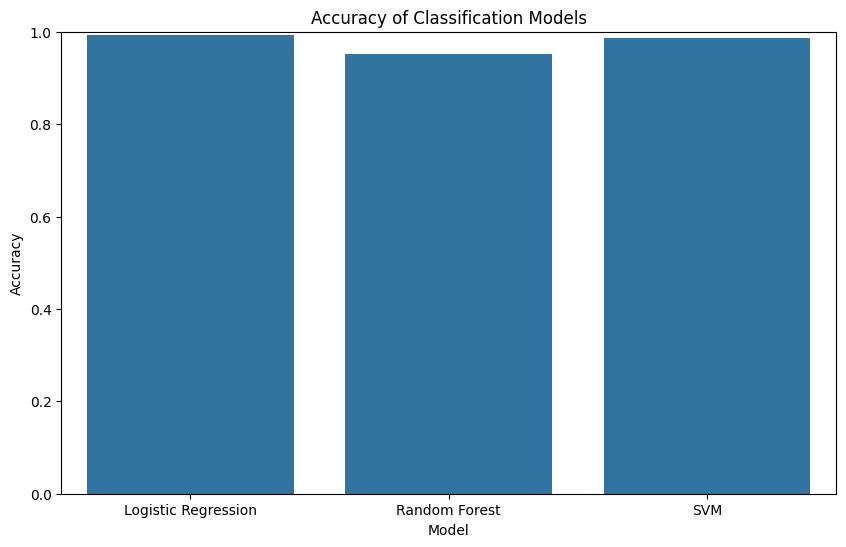

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = pd.concat([breast_df,generated_df])

# Assuming 'target' is your target variable
X = data.drop(['diagnosis',"id"], axis=1)  # Features
y = data['diagnosis']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Train and evaluate models
accuracies = []
model_names = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    model_names.append(name)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Accuracy of Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to ensure accuracy scale from 0 to 1
plt.show()




In [ ]:
accuracies

[0.993006993006993, 0.951048951048951, 0.986013986013986]

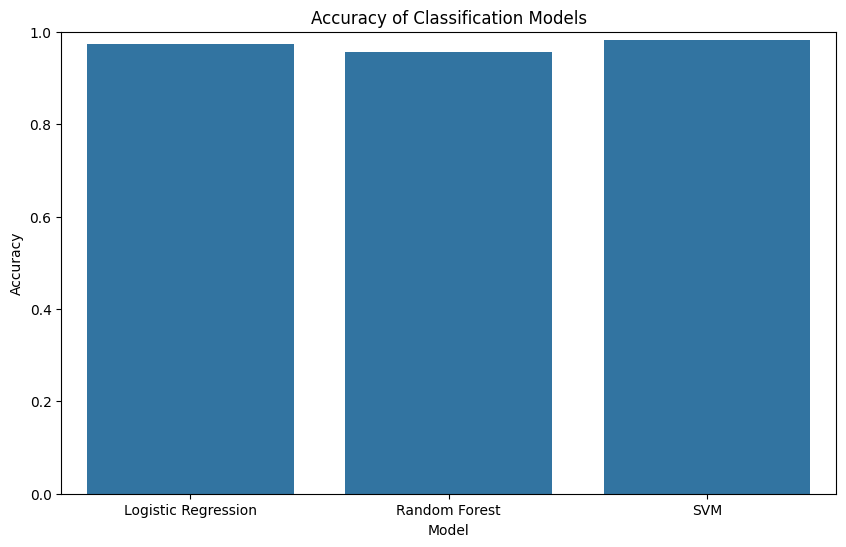

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = breast_df

# Assuming 'target' is your target variable
X = data.drop(['diagnosis',"id"], axis=1)  # Features
y = data['diagnosis']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

import matplotlib.pyplot as plt
import seaborn as sns

# Train and evaluate models
accuracies = []
model_names = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    model_names.append(name)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Accuracy of Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to ensure accuracy scale from 0 to 1
plt.show()



In [ ]:
accuracies

[0.9736842105263158, 0.956140350877193, 0.9824561403508771]